# Algo trading based only on the Simple Moving Average
> Whether you should buy above or below the SMA

* Written Summer 2019.
* Refactored in summer 2021, damn my code was bad.
* Refactored in Jan 2024, God knows how I got into Amazon with this code.

I am assuming fractional shares

In [1]:
invPerTimePeriod = 1000 / 20 # ration 1000 per month, across every day
STOCK = 'SPY'

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import yfinance as yf
import warnings
#warnings.filterwarnings("ignore")

In [3]:
# start="2017-01-01"
# start="2003-3-14"
start="2000-01-01"
df = yf.download(STOCK, start) 
df = df.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
df.head()


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2000-01-03,145.4375
2000-01-04,139.7500
2000-01-05,140.0000
2000-01-06,137.7500
2000-01-07,145.7500


## Dollar cost averaging, like a boomer. 
`base_strategy`

In [7]:
shares = 0 

for i, row in df.iterrows():
    shares += invPerTimePeriod/row.Close
        
value_of_shares_at_end = df.tail(1).Close.values[0]*shares
base_strategy = value_of_shares_at_end
print(f"Numb of shares: {shares:.2f}")
print(f"Shares + Money {value_of_shares_at_end:.2f}")


Numb of shares: 1926.76
Shares + Money 960624.97


## Buying below the Nth SMA

In [12]:
def simulate_buying_below_ma(window=3, buy_if_below=True):
    df['MA'] = df.Close.rolling(window=window).mean().fillna(df.Close[0])
    
    money = 0
    shares = 0 

    for i, row in df.iterrows():
        money += invPerTimePeriod

        diff = row.Close - row.MA
        if (buy_if_below and diff < 0) or (not buy_if_below and diff >= 0):
            shares += money/row.Close
            money = 0

    value_of_shares_at_end = df.tail(1).Close.values[0]*shares

    # reduced printing
    if value_of_shares_at_end + money - base_strategy > 0:
        print(f'Window size is {window}')
        print(f"Money left: {money}")
        print(f"Value of Shares + Money {value_of_shares_at_end + money:.2f}")
        print(f'Improvement over base_strategy: {value_of_shares_at_end + money - base_strategy:.2f}')
        print(f'===================================\n')

In [14]:
print(f'Total with base_strategy: {base_strategy:.2f}')
print(f'===================================\n')

simulate_buying_below_ma(5)
simulate_buying_below_ma(10)
simulate_buying_below_ma(15)
simulate_buying_below_ma(20)
simulate_buying_below_ma(30)
simulate_buying_below_ma(45)
simulate_buying_below_ma(60)
simulate_buying_below_ma(90)
simulate_buying_below_ma(180)
simulate_buying_below_ma(360)
simulate_buying_below_ma(720)

Total with base_strategy: 960624.97

Window size is 4
Money left: 0
Value of Shares + Money 961538.40
Improvement over base_strategy: 913.43

Window size is 5
Money left: 0
Value of Shares + Money 961845.10
Improvement over base_strategy: 1220.13

Window size is 10
Money left: 50.0
Value of Shares + Money 961430.66
Improvement over base_strategy: 805.69

Window size is 15
Money left: 1000.0
Value of Shares + Money 960899.76
Improvement over base_strategy: 274.79

Window size is 45
Money left: 3500.0
Value of Shares + Money 960670.40
Improvement over base_strategy: 45.43

Window size is 60
Money left: 3250.0
Value of Shares + Money 962956.64
Improvement over base_strategy: 2331.67



## What about buying above the Nth SMA

In [15]:
simulate_buying_below_ma(15, buy_if_below=False)
simulate_buying_below_ma(10, buy_if_below=False)
simulate_buying_below_ma(20, buy_if_below=False)
simulate_buying_below_ma(30, buy_if_below=False)
simulate_buying_below_ma(45, buy_if_below=False)
simulate_buying_below_ma(60, buy_if_below=False)
simulate_buying_below_ma(90, buy_if_below=False)
simulate_buying_below_ma(120, buy_if_below=False)
simulate_buying_below_ma(180, buy_if_below=False)
simulate_buying_below_ma(360, buy_if_below=False)
simulate_buying_below_ma(720, buy_if_below=False)

Window size is 90
Money left: 0
Value of Shares + Money 964775.47
Improvement over base_strategy: 4150.51

Window size is 120
Money left: 0
Value of Shares + Money 962020.33
Improvement over base_strategy: 1395.37

Window size is 180
Money left: 0
Value of Shares + Money 961799.57
Improvement over base_strategy: 1174.60

Window size is 360
Money left: 0
Value of Shares + Money 973315.53
Improvement over base_strategy: 12690.56



## Who would have imagined its better than buy and hold, if you buy exclusively above the 90-day Moving Average

<AxesSubplot:title={'center':"SPY and it's 90-day Moving Average"}, xlabel='Date', ylabel='Price'>

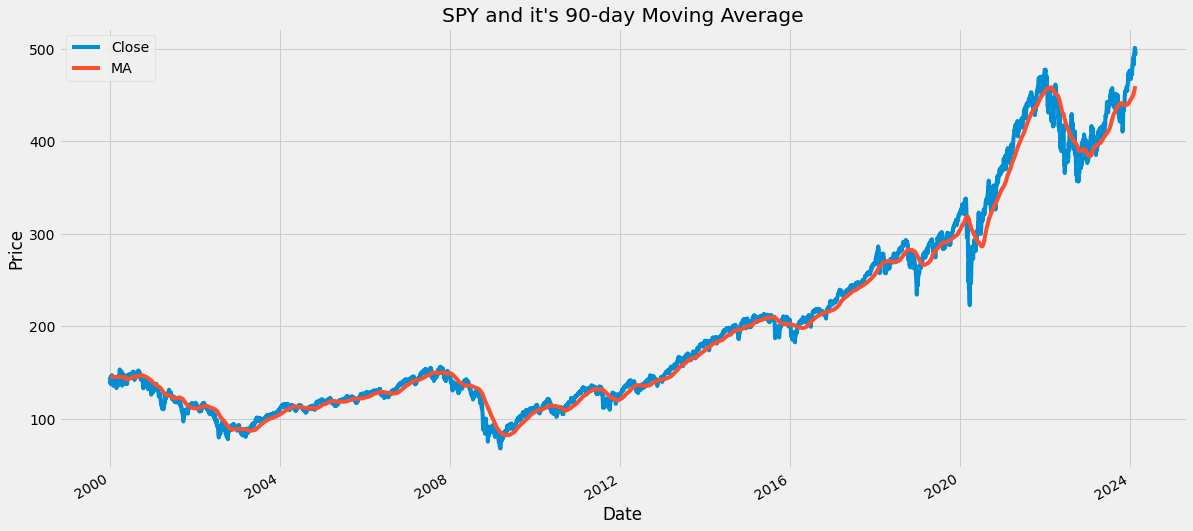

In [ ]:
window = 90
df['MA'] = df.Close.rolling(window=window).mean().fillna(df.Close[0])
df.plot(figsize=(18,9), linewidth=4, title=f"{STOCK} and it's {window}-day Moving Average", ylabel="Price")